In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

Data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [7]:
np.random.seed(42) 
obs, feat = Data.shape
Data.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4793,07/30/2001,16:00,"Haines, Alaska",Air Taxi,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...
5020,11/28/2004,09:55,"Montrose, Colorado",Glow Air/Air Castle - Charter,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air..."
655,06/20/1944,NaN,"Porto Alegre, Brazil",Varig,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.
1874,10/09/1963,NaN,"Near Marseilles, France",Aeronaves de Panama,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...
2318,06/05/1969,07:12,"North Bend, Oregon",Eureka Aero Inc. - Air Taxi,NaN,NaN,Cessna 337C,N2665S,NaN,3.0,3.0,0.0,Collided with trees on approach. Improper IFR ...


In [9]:
print(str("Dataset consist of " + str(obs) + " observations (crashes) and " + str(feat) + " features. Features are following:"))

Dataset consist of 5268 observations (crashes) and 13 features. Features are following:


In [11]:
Data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [13]:
Data['Time'] = Data['Time'].replace(np.nan, '00:00') 
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('18.40', '18:40')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '00:00') #is it 11:20 or 14:20 or smth else? 

Data['Time'] = Data['Date'] + ' ' + Data['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
Data['Time'] = Data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(Data.Time.min()) + ' to ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


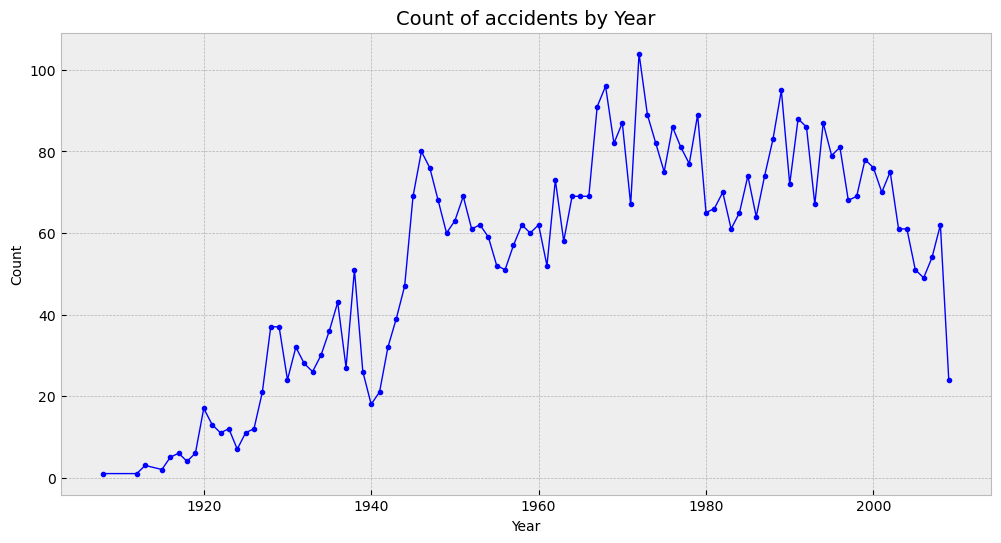

In [15]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

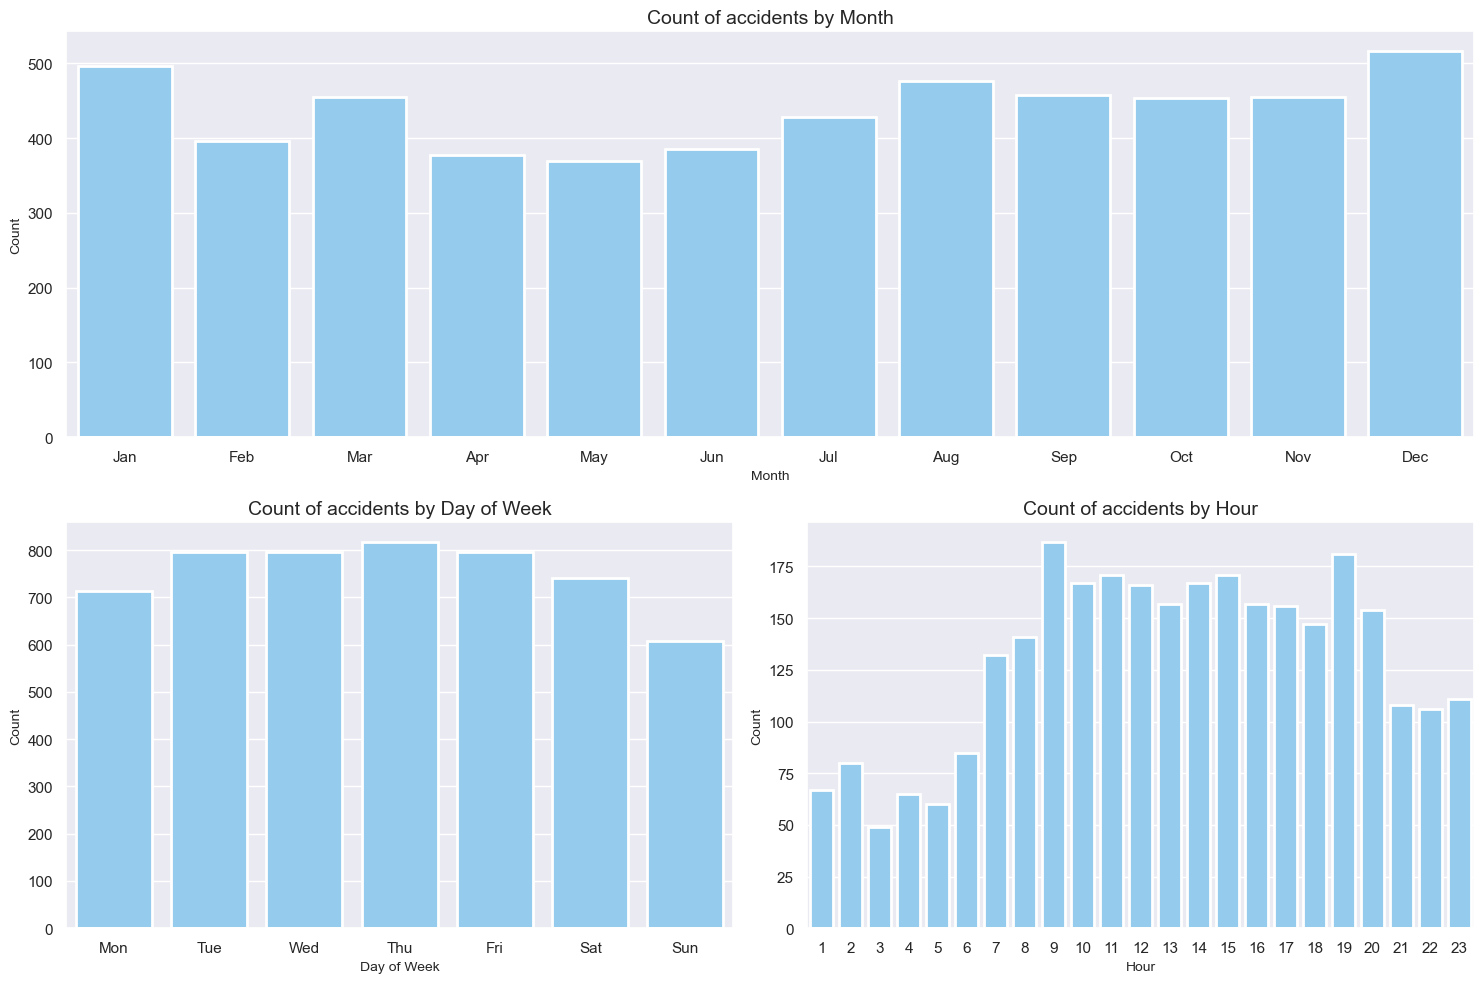

In [27]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_theme(style='darkgrid', palette='muted')
month_counts = Data.groupby(Data.Time.dt.month)[['Date']].count()
weekday_counts = Data.groupby(Data.Time.dt.weekday)[['Date']].count()
hour_counts = Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count()
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(15, 10))
ax = plt.subplot(gs[0, :])
sns.barplot(x=month_counts.index, y='Date', data=month_counts, color='lightskyblue', linewidth=2)
plt.xticks(month_counts.index - 1, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='center', fontsize=14)
ax = plt.subplot(gs[1, 0])
sns.barplot(x=weekday_counts.index, y='Date', data=weekday_counts, color='lightskyblue', linewidth=2)
plt.xticks(weekday_counts.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='center', fontsize=14)
ax = plt.subplot(gs[1, 1])
sns.barplot(x=hour_counts.index, y='Date', data=hour_counts, color='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='center', fontsize=14)
plt.tight_layout()
plt.show()


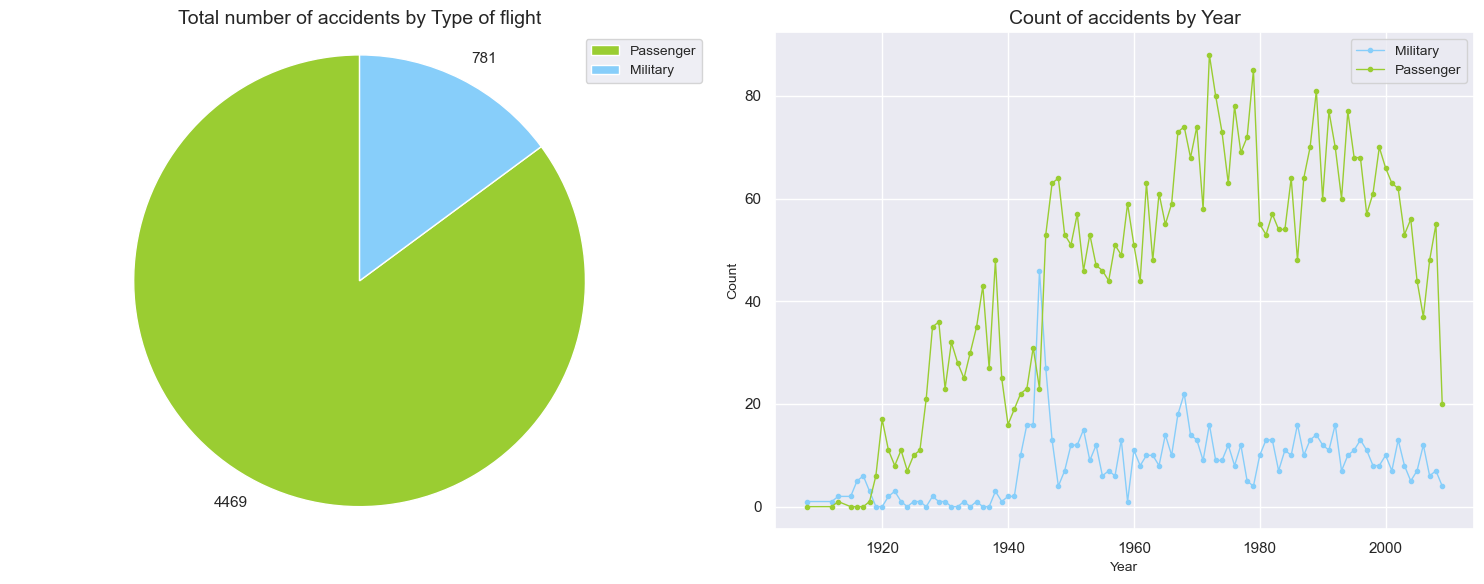

In [30]:
Temp = Data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = Data.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

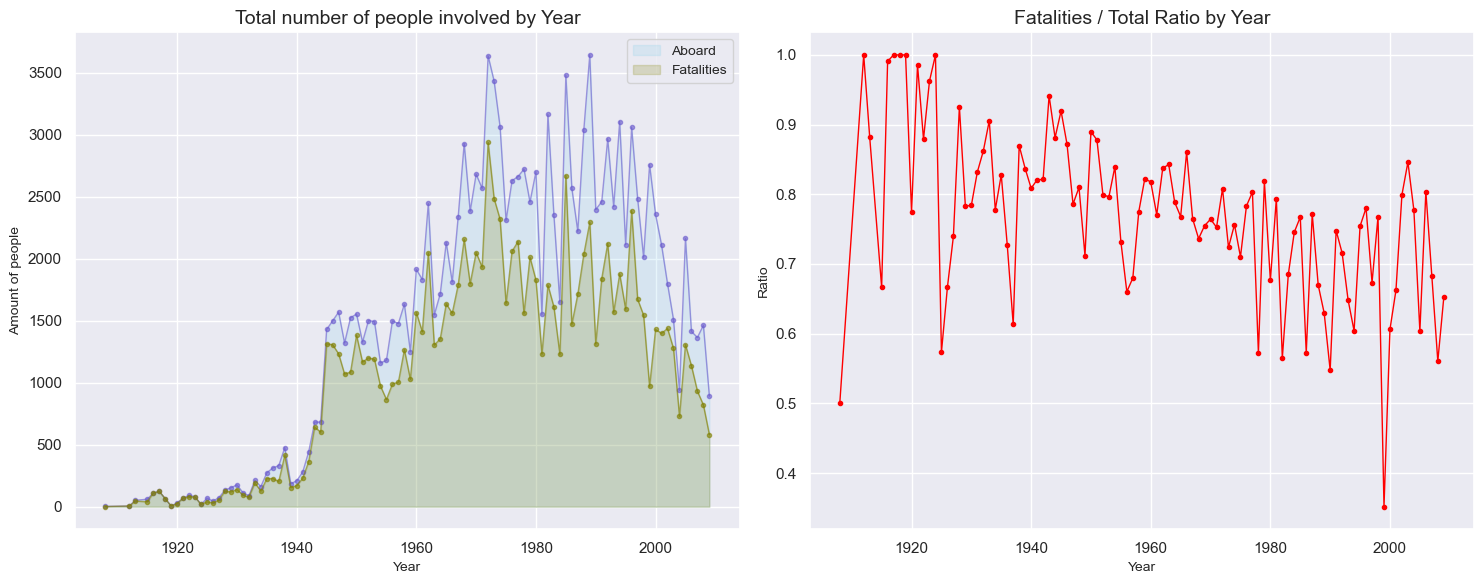

In [35]:
Fatalities = Data.groupby(Data.Time.dt.year)[['Aboard', 'Fatalities']].sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities.index, Fatalities['Aboard'], color="skyblue", alpha=0.2, label='Aboard')
plt.plot(Fatalities.index, Fatalities['Aboard'], marker=".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, Fatalities['Fatalities'], color="olive", alpha=0.2, label='Fatalities')
plt.plot(Fatalities.index, Fatalities['Fatalities'], marker=".", color="olive", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='center', fontsize=14)
plt.subplot(1, 2, 2)
plt.plot(Fatalities.index, Fatalities['Proportion'], marker=".", color='red', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='center', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
Problems with misleading data
So previous plots may look scary - number of fatalities became so high (even so it's seems to trend to decrease after 90s). Guys on reddit made a good point about the fact that graphs don't show the proportion of accidents by all flights by year. So 1970-1990 look like scary years in the history of airf lights with rise of deaths, but there might be also the rise of total amount of people flyong by air while actually proportion became lower.

I was googling the database of total number of flights or passengers and so far I could find just this dataset from worldbank.org. So I have uploaded a .csv dataset from that site and let's see what we've got.

In [40]:
Totals = pd.read_csv('Air transport passengers carried.csv')
Totals.sample(5)

,level_0,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64,flag,Continent
174,174,220,Slovenia,SVN,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,...,8.570000e+05,916981.0,1045409.0,1009559.0,1087075.0,1094762.0,NaN,NaN,https://www.countryflags.io/SI/flat/64.png,Europe
32,32,33,Canada,CAN,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,...,7.152673e+07,75528607.0,80228302.0,85406425.0,91404001.0,89380000.0,NaN,NaN,https://www.countryflags.io/CA/flat/64.png,Americas
8,8,9,American Samoa,ASM,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,...,7.224000e+04,76944.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.countryflags.io/AS/flat/64.png,Oceania
88,88,109,Ireland,IRL,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,...,9.340804e+07,98449140.0,115928738.0,134065078.0,153944513.0,167598633.0,NaN,NaN,https://www.countryflags.io/IE/flat/64.png,Europe
0,0,0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,223502.0,274280.0,NaN,NaN,https://www.countryflags.io/AW/flat/64.png,Americas


In [42]:
Totals = Totals.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis = 1)
Totals = Totals.replace(np.nan, 0)
Totals = pd.DataFrame(Totals.sum())
Totals = Totals.drop(Totals.index[0:10])
Totals = Totals['1970':'2008']
Totals.columns = ['Sum']
Totals.index.name = 'Year'

In [44]:
Fatalities = Fatalities.reset_index()
Fatalities.Time = Fatalities.Time.apply(str)
Fatalities.index = Fatalities['Time']
del Fatalities['Time']
Fatalities = Fatalities['1970':'2008']
Fatalities = Fatalities[['Fatalities']]
Totals = pd.concat([Totals, Fatalities], axis=1) #joining two data frames into one
Totals['Ratio'] = Totals['Fatalities'] / Totals['Sum'] * 100 #calculating ratio

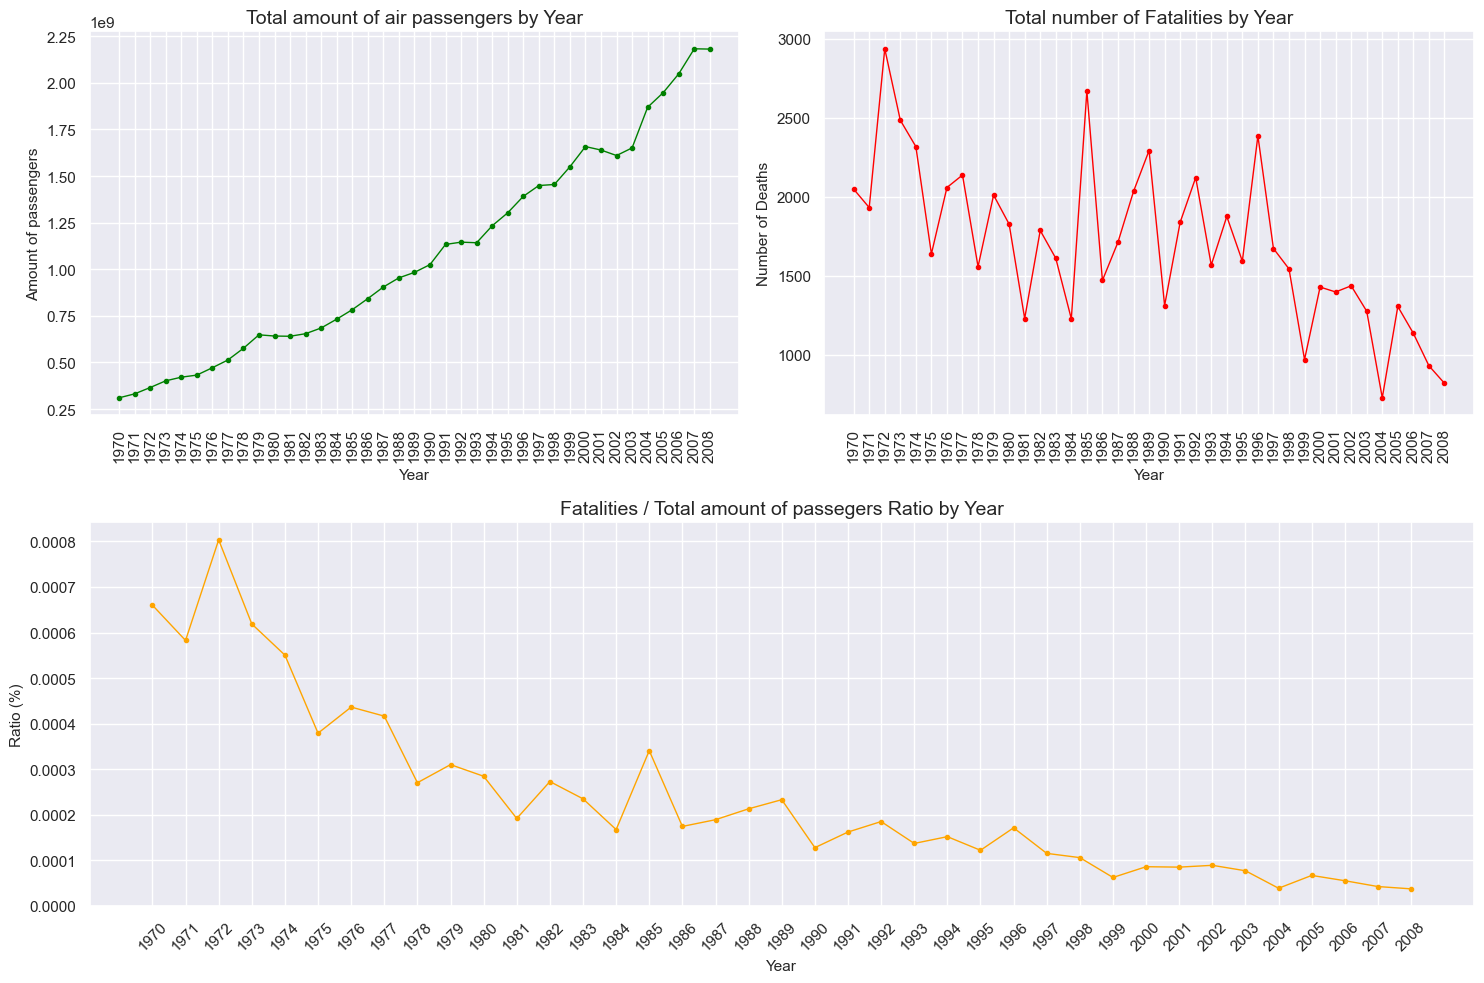

In [46]:
gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15,10))

ax = pl.subplot(gs[0, 0]) 
plt.plot(Totals.index, 'Sum', data=Totals, marker = ".", color = 'green', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Amount of passengers', fontsize=11)
plt.title('Total amount of air passengers by Year', loc='Center', fontsize=14)
plt.xticks(rotation=90)

ax = pl.subplot(gs[0, 1]) 
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color='red', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Number of Deaths', fontsize=11)
plt.title('Total number of Fatalities by Year', loc='Center', fontsize=14)
plt.xticks(rotation=90)

ax = pl.subplot(gs[1, :]) 
plt.plot(Totals.index, 'Ratio', data=Totals, color='orange', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Ratio (%)', fontsize=11)
plt.title('Fatalities / Total amount of passegers Ratio by Year', loc='Center', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
From this plot we can see that trend actually goes down which was maybe not so obvious from plot with amount of deaths only. Let's put line with ratio and number of deaths on one plot.

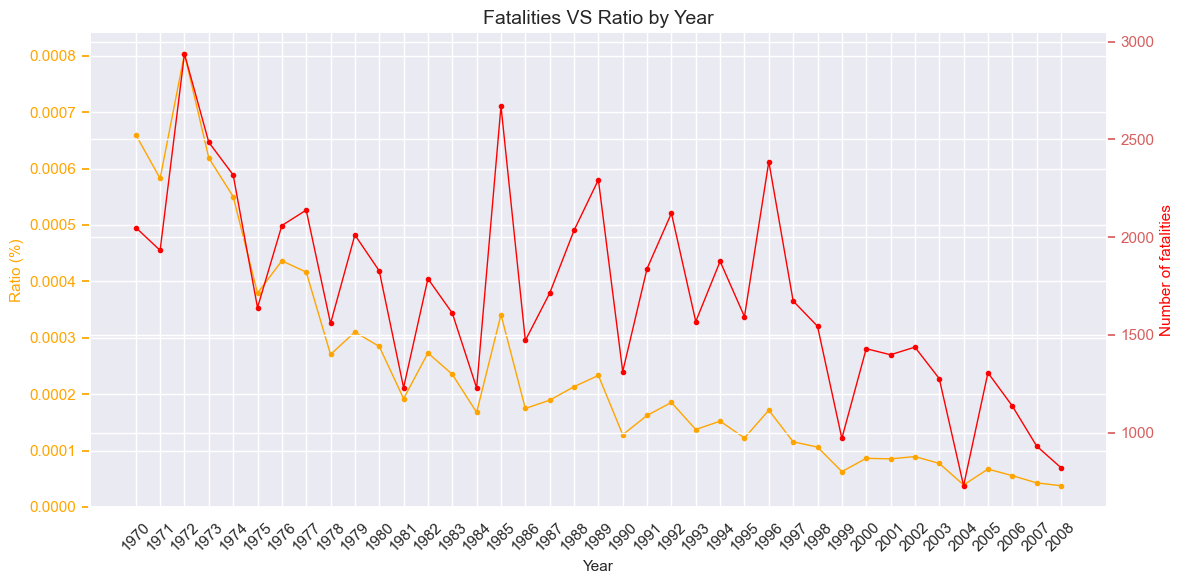

In [49]:
fig =plt.figure(figsize=(12,6))
ax1 = fig.subplots()
ax1.plot(Totals.index, 'Ratio', data=Totals, color='orange', marker = ".", linewidth=1)
ax1.set_xlabel('Year', fontsize=11)
for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
ax1.set_ylabel('Ratio (%)', color='orange', fontsize=11)
ax1.tick_params('y', colors='orange')
ax2 = ax1.twinx()
ax2.plot(Fatalities.index, 'Fatalities', data=Fatalities, color='red', marker = ".", linewidth=1)
ax2.set_ylabel('Number of fatalities', color='red', fontsize=11)
ax2.tick_params('y', colors='r')
plt.title('Fatalities VS Ratio by Year', loc='Center', fontsize=14)
fig.tight_layout()
plt.show()

In [ ]:
We can see that peaks like 1985, 1989, 1992, 1996 look scary, while ratio actually trends down. Of course there are some questions thats are wanted to be asked, like "is it full database of airplane accidents?" or "does total number of passenger include military flights or just passenger?" so this plot is that an estimation.

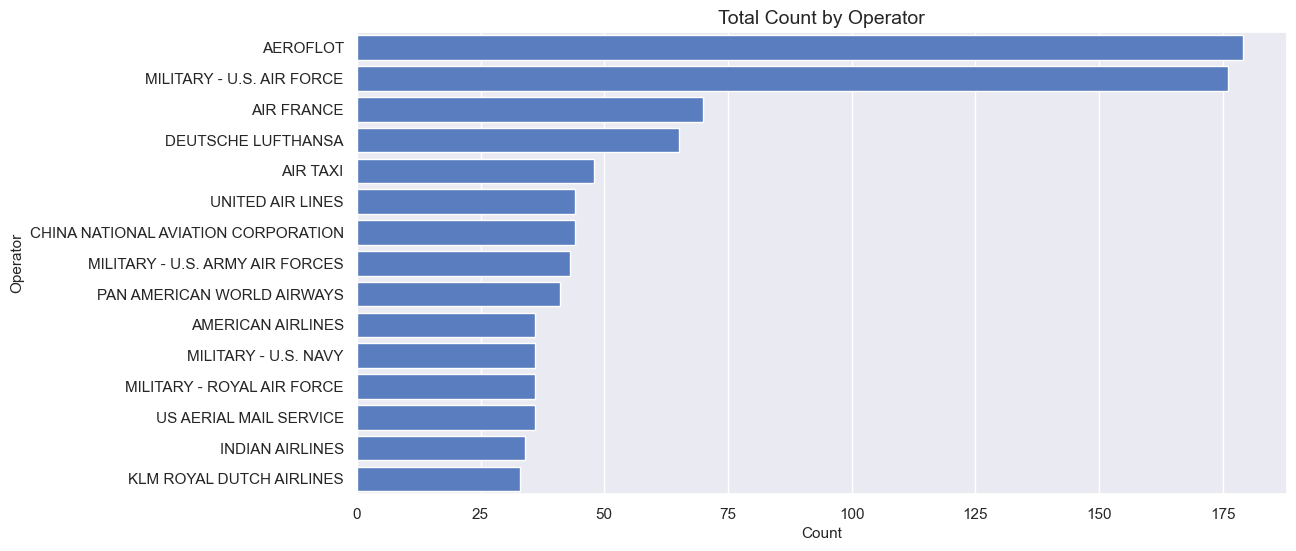

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
Data.Operator = Data.Operator.str.upper()
Data.Operator = Data.Operator.replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')
Total_by_Op = Data.groupby('Operator')[['Operator']].count()
Total_by_Op = Total_by_Op.rename(columns={"Operator": "Count"})
Total_by_Op = Total_by_Op.sort_values(by='Count', ascending=False).head(15)
plt.figure(figsize=(12,6))
sns.barplot(y=Total_by_Op.index, x="Count", data=Total_by_Op, orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Count by Operator', loc='center', fontsize=14)  # Fixed typo 'Opeartor' to 'Operator'
plt.show()

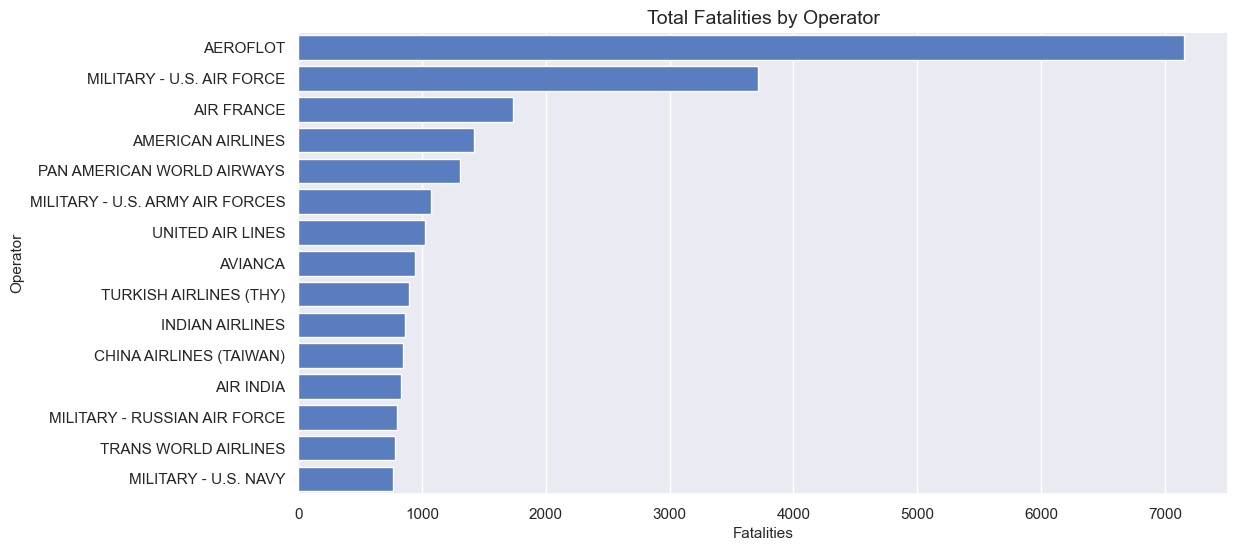

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
Prop_by_Op = Data.groupby('Operator')[['Fatalities']].sum()
Prop_by_Op = Prop_by_Op.sort_values(by='Fatalities', ascending=False)
Prop_by_OpTOP = Prop_by_Op.head(15)
plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTOP.index, x="Fatalities", data=Prop_by_OpTOP, orient='h')
plt.xlabel('Fatalities', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Fatalities by Operator', loc='center', fontsize=14) 
plt.show()

In [ ]:
Let's find out which Flight Operators actually have the least number of people involved:

In [66]:
Prop_by_Op[Prop_by_Op['Fatalities'] == Prop_by_Op.Fatalities.min()].index.tolist()

['MILITARY - EJÉRCITO DEL AIRE',
 'ARARAT AVIA',
 'HEWA BORA AIRWAYS',
 'MILITARY - UKRAINE AIR FORCE',
 'MILITARY - U.S. AIR FORCE / MILITARY U.S. AIR FORCE',
 'CANADIAN AIR TRANSAT',
 'MILITARY U.S. NAVY',
 'ISLAND SKY FERRY - AIR TAXI',
 'US AIRWAYS',
 'SOUTHWEST AIRLINES',
 'CENTURIAN AIR CARGO',
 'AMERICAN INTERNATIONAL AIRWAYS',
 'REGIONAL COMPAGNIE AERIENNE EUROPEENNE',
 'WESTERN HELICOPTER']

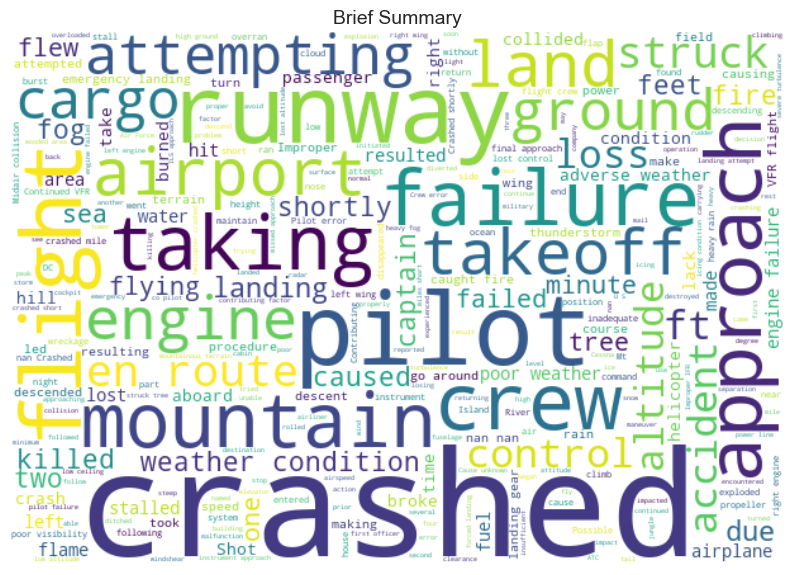

In [76]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(Data.Summary.tolist())
plane_mask = np.array(Image.open('aircarft.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Brief Summary', loc='Center', fontsize=14)
plt.savefig('aircraft wordcloud.jpg', dpi=50)
plt.show()

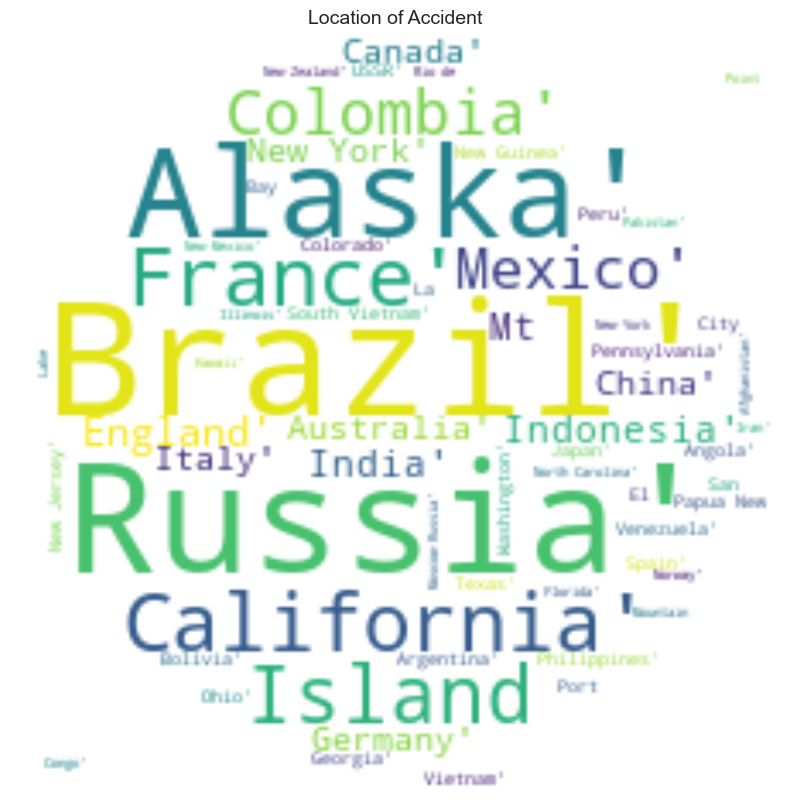

In [80]:
text = str(Data.Location.tolist())
globe_mask = np.array(Image.open('airplane with stand with word cloud.jpeg'))

stopwords = set(STOPWORDS)
stopwords.add('nan')
stopwords.add('Near')

wc = WordCloud(background_color="white", max_words=2000, mask=globe_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Location of Accident', loc='Center', fontsize=14)
plt.show()


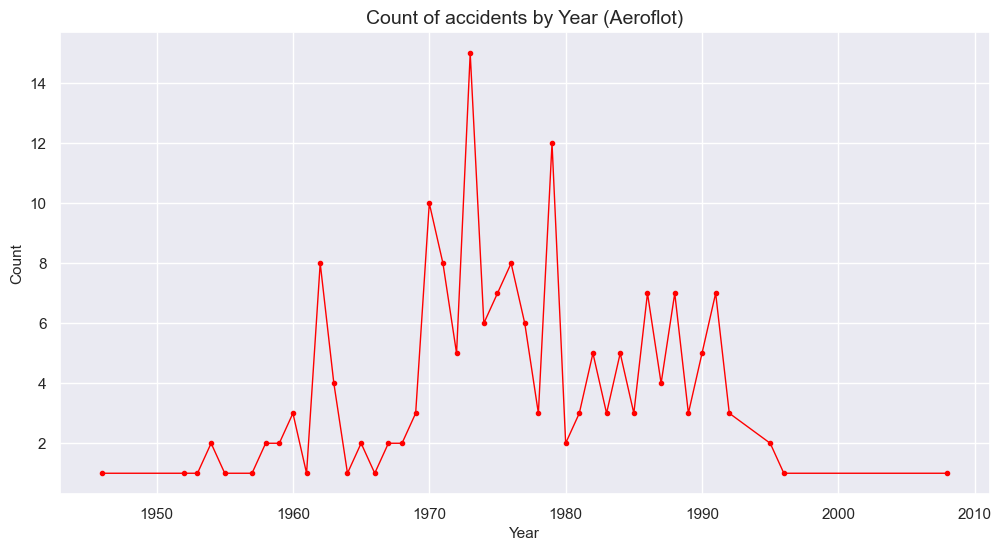

In [82]:
Aeroflot = Data[Data.Operator == 'AEROFLOT']

Count_by_Year = Aeroflot.groupby(Data.Time.dt.year)[['Date']].count()
Count_by_Year = Count_by_Year.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.plot(Count_by_Year.index, 'Count', data=Count_by_Year, marker='.', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of accidents by Year (Aeroflot)', loc='Center', fontsize=14)
plt.show()